<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_generalYelpUsersSentiment_byGroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [33]:
import warnings
# Prendo i dati che mi servono di tutti i ristoranti

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'
feminine = res['gender'] == 'feminine'
masculine = res['gender'] == 'masculine'

# sopprimo il Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)

under40 = res['age'] < 40
over40 = res['age'] > 40


# ALL RESTAURANTS

# ETNIA E ETA'

totAmericanUsers_under40 = len(res[((black_american) | (white_american)) & (under40)])
totAmericanUsers_over40 = len(res[((black_american) | (white_american)) & (over40)])
totAsianUsers_under40 = len(res[(asian) & (under40)])
totAsianUsers_over40 = len(res[(asian) & (over40)])
totMexicanUsers_under40 = len(res[(mexican) & (under40)])
totMexicanUsers_over40 = len(res[(mexican) & (over40)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under40_positive = ((len(res[((black_american) & (positive) & (under40)) | ((white_american) & (positive) & (under40))])) * 100) / totAmericanUsers_under40
american_over40_positive = ((len(res[((black_american) & (positive) & (over40)) | ((white_american) & (positive) & (over40))])) * 100) / totAmericanUsers_over40

asian_under40_positive = (len(res[(asian) & (positive) & (under40)]) * 100) / totAsianUsers_under40
asian_over40_positive = (len(res[(asian) & (positive) & (over40)]) * 100) / totAsianUsers_over40

mexican_under40_positive = (len(res[(mexican) & (positive) & (under40)]) * 100) / totMexicanUsers_under40
mexican_over40_positive = (len(res[(mexican) & (positive) & (over40)]) * 100) / totMexicanUsers_over40


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under40_negative = ((len(res[((black_american) & (negative) & (under40)) | ((white_american) & (negative) & (under40))])) * 100) / totAmericanUsers_under40
american_over40_negative = ((len(res[((black_american) & (negative) & (over40)) | ((white_american) & (negative) & (over40))])) * 100) / totAmericanUsers_over40

asian_under40_negative = (len(res[(asian) & (negative) & (under40)]) * 100) / totAsianUsers_under40
asian_over40_negative = (len(res[(asian) & (negative) & (over40)]) * 100) / totAsianUsers_over40

mexican_under40_negative = (len(res[(mexican) & (negative) & (under40)]) * 100) / totMexicanUsers_under40
mexican_over40_negative = (len(res[(mexican) & (negative) & (over40)]) * 100) / totMexicanUsers_over40

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under40_neutral = ((len(res[((black_american) & (neutral) & (under40)) | ((white_american) & (neutral) & (under40))])) * 100) / totAmericanUsers_under40
american_over40_neutral = ((len(res[((black_american) & (neutral) & (over40)) | ((white_american) & (neutral) & (over40))])) * 100) / totAmericanUsers_over40

asian_under40_neutral = (len(res[(asian) & (neutral) & (under40)]) * 100) / totAsianUsers_under40
asian_over40_neutral = (len(res[(asian) & (neutral) & (over40)]) * 100) / totAsianUsers_over40

mexican_under40_neutral = (len(res[(mexican) & (neutral) & (under40)]) * 100) / totMexicanUsers_under40
mexican_over40_neutral = (len(res[(mexican) & (neutral) & (over40)]) * 100) / totMexicanUsers_over40


#------------------------------------------------------------------------------------------------------------------------------------------------------------


# ETNIA E GENERE
# Percentuali di opinione di un GENERE in generale su yelp, in base al numero effettivo di utenti dello stesso genere

totAmericanUsers_feminine = len(res[((black_american) | (white_american)) & (feminine)])
totAmericanUsers_masculine = len(res[((black_american) | (white_american)) & (masculine)])
totAsianUsers_feminine = len(res[(asian) & (feminine)])
totAsianUsers_masculine = len(res[(asian) & (masculine)])
totMexicanUsers_feminine = len(res[(mexican) & (feminine)])
totMexicanUsers_masculine = len(res[(mexican) & (masculine)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_positive = ((len(res[((black_american) & (positive) & (feminine)) | ((white_american) & (positive) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_positive = ((len(res[((black_american) & (positive) & (masculine)) | ((white_american) & (positive) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_positive = (len(res[(asian) & (positive) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_positive = (len(res[(asian) & (positive) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_positive = (len(res[(mexican) & (positive) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_positive = (len(res[(mexican) & (positive) & (masculine)]) * 100) / totMexicanUsers_masculine

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_negative = ((len(res[((black_american) & (negative) & (feminine)) | ((white_american) & (negative) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_negative = ((len(res[((black_american) & (negative) & (masculine)) | ((white_american) & (negative) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_negative = (len(res[(asian) & (negative) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_negative = (len(res[(asian) & (negative) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_negative = (len(res[(mexican) & (negative) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_negative = (len(res[(mexican) & (negative) & (masculine)]) * 100) / totMexicanUsers_masculine

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_neutral = ((len(res[((black_american) & (neutral) & (feminine)) | ((white_american) & (neutral) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_neutral = ((len(res[((black_american) & (neutral) & (masculine)) | ((white_american) & (neutral) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_neutral = (len(res[(asian) & (neutral) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_neutral = (len(res[(asian) & (neutral) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_neutral = (len(res[(mexican) & (neutral) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_neutral = (len(res[(mexican) & (neutral) & (masculine)]) * 100) / totMexicanUsers_masculine


#------------------------------------------------------------------------------------------------------------------------------------------------------------


# GENERE E ETA'
# Percentuali di opinione per gruppi di età in generale su yelp, in base al numero effettivo di utenti della stessa stessa età

totWomenUsers_under40 = len(res[(feminine) & (under40)])
totWomenUsers_over40 = len(res[(feminine) & (over40)])
totMenUsers_under40 = len(res[(masculine) & (under40)])
totMenUsers_over40 = len(res[(masculine) & (over40)])


# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
women_under40_positive = ((len(res[(feminine) & (positive) & (under40)])) * 100) / totWomenUsers_under40
women_over40_positive = ((len(res[(feminine) & (positive) & (over40)])) * 100) / totWomenUsers_over40

men_under40_positive = (len(res[(masculine) & (positive) & (under40)]) * 100) / totMenUsers_under40
men_over40_positive = (len(res[(masculine) & (positive) & (over40)]) * 100) / totMenUsers_over40


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
women_under40_negative = ((len(res[(feminine) & (negative) & (under40)])) * 100) / totWomenUsers_under40
women_over40_negative = ((len(res[(feminine) & (negative) & (over40)])) * 100) / totWomenUsers_over40

men_under40_negative = (len(res[(masculine) & (negative) & (under40)]) * 100) / totMenUsers_under40
men_over40_negative = (len(res[(masculine) & (negative) & (over40)]) * 100) / totMenUsers_over40

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
women_under40_neutral = ((len(res[(feminine) & (neutral) & (under40)])) * 100) / totWomenUsers_under40
women_over40_neutral = ((len(res[(feminine) & (neutral) & (over40)])) * 100) / totWomenUsers_over40

men_under40_neutral = (len(res[(masculine) & (neutral) & (under40)]) * 100) / totMenUsers_under40
men_over40_neutral = (len(res[(masculine) & (neutral) & (over40)]) * 100) / totMenUsers_over40


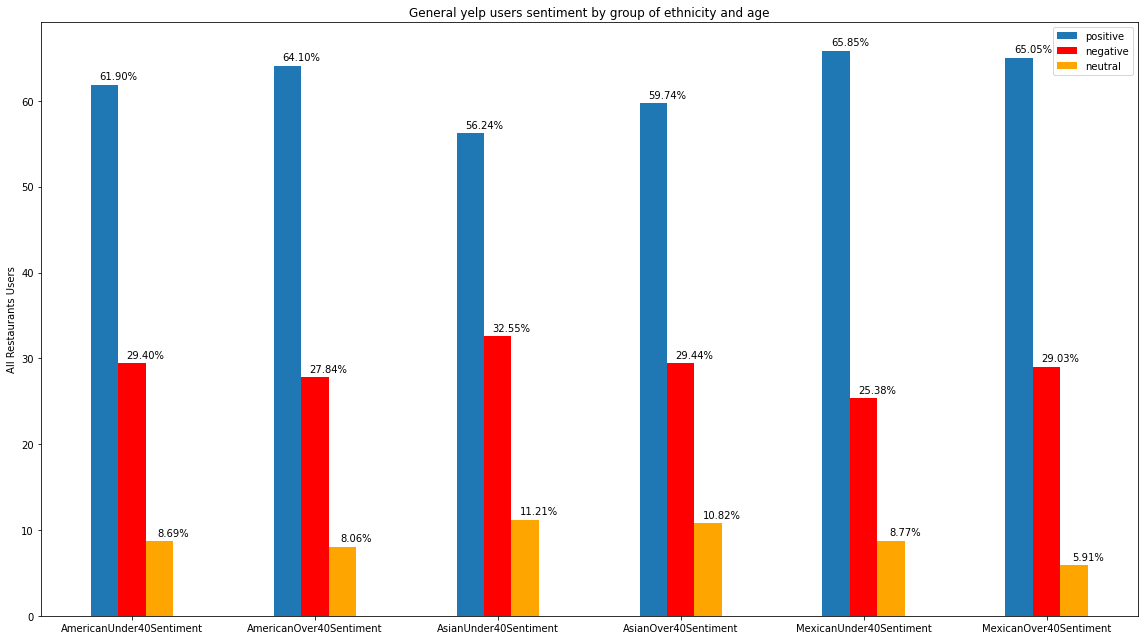

In [35]:
# Costruisco il grafico

labels = ['AmericanUnder40Sentiment', 'AmericanOver40Sentiment', 'AsianUnder40Sentiment', 'AsianOver40Sentiment', 'MexicanUnder40Sentiment', 'MexicanOver40Sentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ETNIA E ETA'

# valori barre
positive = [american_under40_positive, american_over40_positive, asian_under40_positive, asian_over40_positive, mexican_under40_positive, mexican_over40_positive]
negative = [american_under40_negative, american_over40_negative, asian_under40_negative, asian_over40_negative, mexican_under40_negative, mexican_over40_negative]
neutral = [american_under40_neutral, american_over40_neutral, asian_under40_neutral, asian_over40_neutral, mexican_under40_neutral, mexican_over40_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment by group of ethnicity and age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

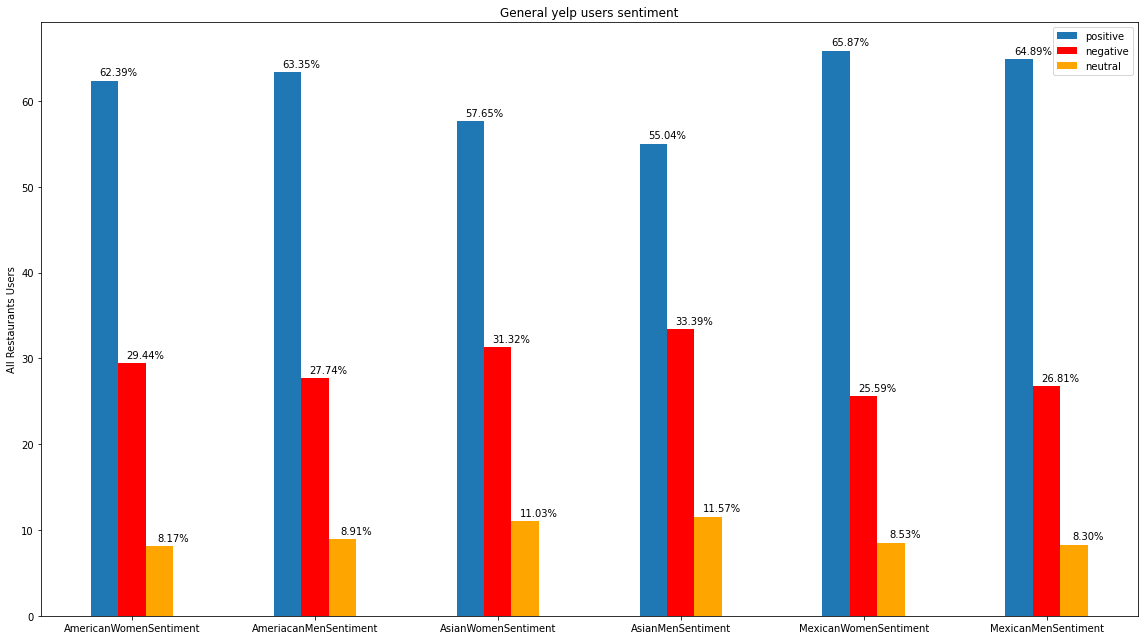

In [37]:
# Costruisco il grafico

labels = ['AmericanWomenSentiment', 'AmeriacanMenSentiment', 'AsianWomenSentiment', 'AsianMenSentiment', 'MexicanWomenSentiment', 'MexicanMenSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ETNIA E GENERE

# valori barre
positive = [american_women_positive, american_men_positive, asian_women_positive, asian_men_positive, mexican_women_positive, mexican_men_positive]
negative = [american_women_negative, american_men_negative, asian_women_negative, asian_men_negative, mexican_women_negative, mexican_men_negative]
neutral = [american_women_neutral, american_men_neutral, asian_women_neutral, asian_men_neutral, mexican_women_neutral, mexican_men_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

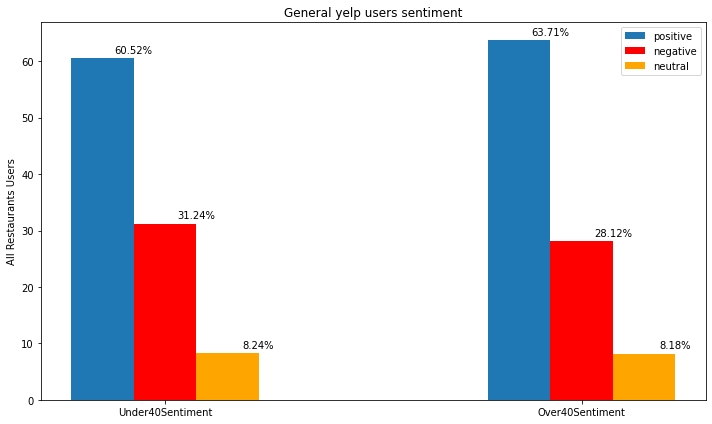

In [26]:
# Costruisco il grafico   -> DA FARE

labels = ['Under40Sentiment', 'Over40Sentiment']

# GRAFICO PER TUTTI GLI UTENTI PER GENERE E ETA'

# valori barre
positive = [under40_positive, over40_positive]
negative = [under40_negative, over40_negative]
neutral = [under40_neutral, over40_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

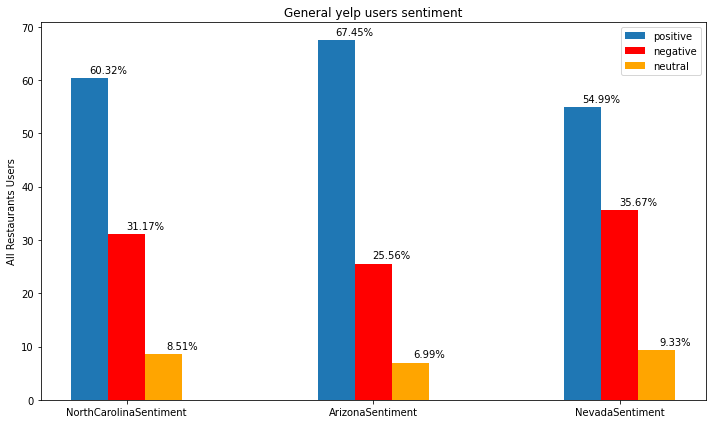

In [31]:
# Costruisco il grafico

labels = ['NorthCarolinaSentiment', 'ArizonaSentiment', 'NevadaSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ZONA

# valori barre
positive = [nc_positive, az_positive, nv_positive]
negative = [nc_negative, az_negative, nv_negative]
neutral = [nc_neutral, az_neutral, nv_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()